## CAR PRICE PREDICTION

**Problem Statement**

**With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some
cars are in demand hence making them costly and some are not in demand hence cheaper. One
of our clients works with small traders, who sell used cars. With the change in market due to covid
19 impact, our client is facing problems with their previous car price valuation machine learning
models. So, they are looking for new machine learning models from new data. We have to make
car price valuation model.**

Aim : We have to make car price valuation model.

Dataset:
    We have data for 5270 used cars in the dataset with 7 features about each car along with the target variable, price of car.

In [1]:
#Loading the dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("used_cars.csv")
data.head(10)

,Brand,Model,Manufacturing_Year,Kilometers_Driven,Fuel_Type,No_of_owners,Location,Car_Price
0,Skoda,Superb,2012.0,58000.0,DIESEL,1st,"Ramesh Nagar, Delhi, Delhi",425000
1,Benz,Mercedes- S-Class,2016.0,41000.0,PETROL,1st,"Tilak Nagar, Delhi, Delhi",6990000
2,Benz,Mercedes- C-Class,2021.0,9700.0,PETROL,1st,"F 10, Shopping Centre, Near OBC Bank, Mansarov...",4990000
3,Skoda,Superb,2010.0,120000.0,PETROL,First,NaN,165000
4,Maruti,Suzuki Swift Dzire,2016.0,70000.0,CNG,Second,NaN,395000
5,Toyota,Innova Crysta,2018.0,11800.0,DIESEL,1st,"Rohini Sector 7, Delhi, Delhi",2129000
6,Nissan,Sunny,2012.0,72534.0,DIESEL,1st,"Rohini Sector 2, Delhi, Delhi",220000
7,Hyundai,Santro Xing,2013.0,65000.0,PETROL,1st,"Udyog Nagar Industrial Area, Delhi, Delhi",180000
8,Hyundai,I10,2011.0,62300.0,CNG & HYBRIDS,2nd,"Rohini Sector 7, Delhi, Delhi",221000
9,Toyota,Corolla Altis,2012.0,47000.0,PETROL,1st,"Rohini Sector 7, Delhi, Delhi",445000


### Exploratory Data Analysis

In [2]:
data.shape

(5270, 8)

We have 5270 rows and 8 columns in the dataset.

In [3]:
data.dtypes

Brand                  object
Model                  object
Manufacturing_Year    float64
Kilometers_Driven     float64
Fuel_Type              object
No_of_owners           object
Location               object
Car_Price               int64
dtype: object

We have string, float and integer type of data in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5270 non-null   object 
 1   Model               5269 non-null   object 
 2   Manufacturing_Year  5269 non-null   float64
 3   Kilometers_Driven   5267 non-null   float64
 4   Fuel_Type           5247 non-null   object 
 5   No_of_owners        5195 non-null   object 
 6   Location            5049 non-null   object 
 7   Car_Price           5270 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 329.5+ KB


We have 5270 non null values in columns ['Brand', 'Car_Price']

In [5]:
data.columns

Index(['Brand', 'Model', 'Manufacturing_Year', 'Kilometers_Driven',
       'Fuel_Type', 'No_of_owners', 'Location', 'Car_Price'],
      dtype='object')

### Features in Dataset(Independent Variable)

`Brand` - Brand of the car

`Model` - Model and variant of the car

`Manufacturing_Year` - Manufacturing year of the car

`Kilometers_Driven` - Total Kilometers driven as per odometer

`Fuel_Type` - Fuel type

`No_of_owners` - Number of owners from the first purchase.

`Location` - Current location of the car or registration of the car

### Target in dataset(Dependent Variable)

`Car_Price` - Price for which the car is available for sale.

### Exploring the categorical Variables in the dataset

In [6]:
#Categorical columns in the dataset
for i in data.columns:
    if data[i].dtypes =='O':
        print(i)
        print('*'*50)
        print(data[i].nunique())
        print(data[i].unique())
        missing = data[i].isnull().sum()
        print("Missing Value Count : ",missing)
        total = 1168
        missing_per = (missing/total)*100
        print("Missing Data Percent : ",missing_per)
        print("^"*50)

Brand
**************************************************
38
['Skoda' 'Benz' 'Maruti' 'Toyota' 'Nissan' 'Hyundai' 'Honda' 'Tata'
 'Mercedes' 'Audi' 'Mini' 'Bmw' 'Land' 'Volvo' 'Mahindra' 'Volkswagen'
 'Chevrolet' 'Renault' 'Ford' 'Bajaj' 'Porsche' 'Hummer' 'Kia'
 'Ambassador' 'Fiat' 'Jeep' 'Datsun' 'Mg' 'Jaguar' 'Mitsubishi'
 'Hindustan' 'Bentley' 'Isuzu' 'Other' 'Maserati' 'MG' 'KIA' 'BMW']
Missing Value Count :  0
Missing Data Percent :  0.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Model
**************************************************
760
['Superb' 'Mercedes- S-Class' 'Mercedes- C-Class' 'Suzuki Swift Dzire'
 'Innova Crysta' 'Sunny' 'Santro Xing' 'I10' 'Corolla Altis'
 'Suzuki Wagon R' 'City Zx' 'Tiago' 'Suzuki Alto K10' 'Civic'
 'Benz Gle Class' 'Mercedes- E-Class' 'Q2' 'Cooper Convertible' 'Innova'
 'X1' 'Safari' 'Suzuki Swift' 'A3 Cabriolet' 'Rover Range Rover'
 'Rover Range Rover Sport' 'Xc40' 'Fluidic Verna' 'City' 'Scorpio'
 'Grand I10' 'Suzuki Ritz' 'Fortuner' 'Suz

We can see that there are same categories which are mentioned in different names in the column 'Brand'. We can rename the values and put them in same categories.

In [7]:
data['Brand'].replace("Bmw","BMW", inplace = True)
data['Brand'].replace("Kia","KIA", inplace = True)
data['Brand'].replace("Mg",'MG', inplace = True)
data["Brand"].replace("Mercedes","Mercedes-Benz",inplace = True)
data["Brand"].replace("Benz","Mercedes-Benz",inplace = True)
data["Brand"].replace("Land","Land Rover", inplace = True)
data['Brand'].replace("Ambassador","Hindustan",inplace = True)

We can see that the column "Fuel_Type" is having multiple values for same categories in different names. We can rename the duplicate columns.


In [8]:
data['Fuel_Type'].replace("Petrol","PETROL",inplace = True)
data['Fuel_Type'].replace("Diesel","DIESEL",inplace = True)
data['Fuel_Type'].replace("PETROL/COMPRESSED NATURAL GAS","Petrol + CNG",inplace = True)

We can see that the column "No_of_owners" is having multiple values for same categories in different names. We can rename the duplicate columns.

In [9]:
first = ["1st","First","1st Owner"]
second = ["Second",'2nd','2nd Owner']
third = ['Third','3rd','3rd Owner']
data['No_of_owners'].replace(first,'1st',inplace = True)
data['No_of_owners'].replace(second,'2nd',inplace = True)
data['No_of_owners'].replace(third,'3rd',inplace = True)
data['No_of_owners'].replace('Fourth','4th',inplace = True)

We have removed the duplicate categories by renaming the values with original category for the columns ['Brand','Fuel_Type','No_of_owners'].

### Checking for Missing Values

Location              221
No_of_owners           75
Fuel_Type              23
Kilometers_Driven       3
Model                   1
Manufacturing_Year      1
Brand                   0
Car_Price               0
dtype: int64


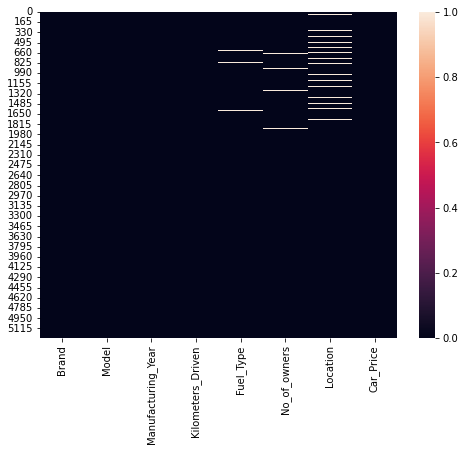

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [8,6])
sns.heatmap(data.isnull())
print(data.isnull().sum().sort_values(ascending=False))

The columns ['Location', 'No_of_owners', 'Fuel_Type', 'Kilometers_Driven', 'Model', 'Manufacturing_Year'] are having missing values.

In [11]:
import numpy as np
for i in data.columns:
    if data[i].dtypes == 'O':
        data[i].fillna(data[i].mode()[0],inplace = True) #imputing mean value for missing values in numerical variables.
    elif ((data[i].dtypes == 'float64') or (data[i].dtypes =='int64')):
        data[i].fillna(np.mean(data[i]),inplace = True) #imputing mode value for missing values in categorical variables.

Brand                 0
Model                 0
Manufacturing_Year    0
Kilometers_Driven     0
Fuel_Type             0
No_of_owners          0
Location              0
Car_Price             0
dtype: int64


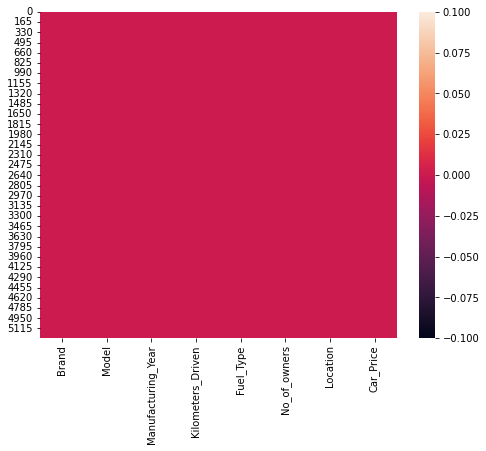

In [12]:
#Checking whether the null values are replaced with mean/mode or not.
plt.figure(figsize = [8,6])
sns.heatmap(data.isnull())
print(data.isnull().sum())

We imputed the mean value for missing values in numerical columns and mode value of column for missing values in categorical columns in the dataset.

### Data Visualization

#### Univariate Analysis

Maruti           1732
Hyundai          1206
Honda             526
Mahindra          247
Renault           241
Toyota            241
Tata              204
Volkswagen        164
Ford              128
Mercedes-Benz      75
MG                 66
Skoda              64
Nissan             53
BMW                52
Jeep               52
KIA                51
Audi               43
Chevrolet          30
Datsun             30
Jaguar             14
Land Rover         12
Volvo              10
Mini                5
Porsche             5
Fiat                5
Mitsubishi          3
Bentley             2
Hindustan           2
Hummer              2
Bajaj               2
Isuzu               1
Other               1
Maserati            1
Name: Brand, dtype: int64


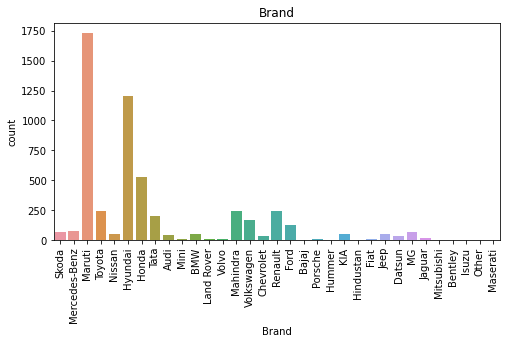

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
PETROL           3576
DIESEL           1486
CNG & HYBRIDS     122
CNG                48
Petrol + CNG       29
ELECTRIC            4
LPG                 4
Petrol + LPG        1
Name: Fuel_Type, dtype: int64


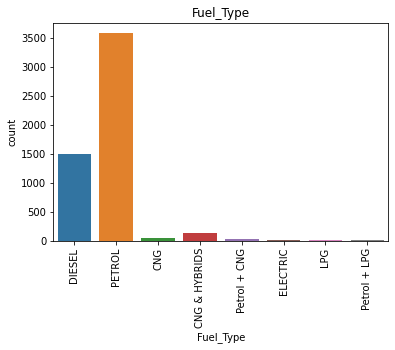

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
1st    4086
2nd    1031
3rd     128
4th      19
4+        6
Name: No_of_owners, dtype: int64


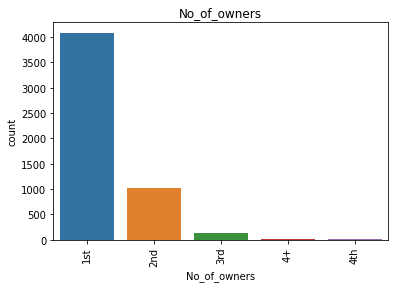

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [13]:
#plotting the categorical variables in the dataset. We havn't plotted the columns'Model' and Location since there are more than 50 unique values.
plt.figure(figsize = [8,4])
for i in data.columns:
    if (data[i].dtypes =='O' and data[i].nunique() <50):
        a = 0
        print(data[i].value_counts().sort_values(ascending = False))
        plt.subplot(1,1,a+1)
        sns.countplot(data[i])
        plt.xticks(rotation = 90)
        plt.title("{}".format(i))
        plt.show()
        print("^"*60)
        a+= 1

Observations:
    
* Most of the cars which are available for sale is from Brand "Maruti". Second highest cars which are available for sale is from 'Hyundai'. These are the two major car sellers in the country.
* Most of the cars which are available for sale are petrol powered. Second most cars which are available for sale are powered by diesel.
* Most of the cars which are available for sale are single owner vehicles. 

(array([   2,    0,    0,    1,  148, 5119], dtype=int64), array([1942.        , 1955.33333333, 1968.66666667, 1982.        ,
       1995.33333333, 2008.66666667, 2022.        ]))


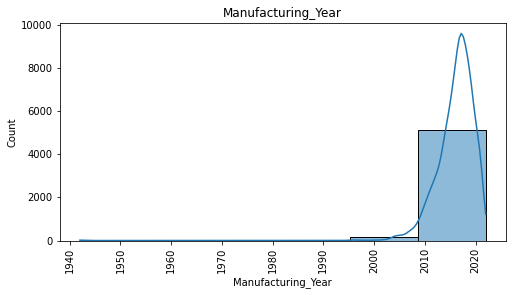

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(array([5221,   38,    0,    2,    3,    6], dtype=int64), array([     1.        , 166667.33333333, 333333.66666667, 500000.        ,
       666666.33333333, 833332.66666667, 999999.        ]))


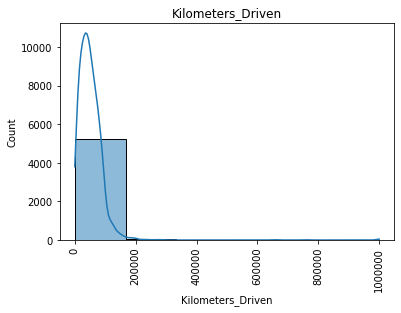

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(array([5195,   62,    9,    3,    0,    1], dtype=int64), array([   15000.        ,  3629166.66666667,  7243333.33333333,
       10857500.        , 14471666.66666667, 18085833.33333333,
       21700000.        ]))


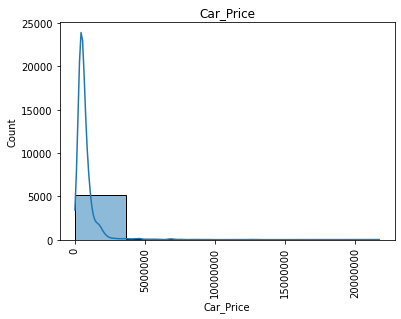

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [14]:
#plotting the categorical variables in the dataset. We havn't plotted the columns'Model' and Location since there are more than 50 unique values.
plt.figure(figsize = [8,4])
for i in data.columns:
    if (data[i].dtypes =='int64' or data[i].dtypes == 'float64'):
        a = 0
        plt.subplot(1,1,a+1)
        sns.histplot(x =i,data = data,bins =6,kde=True)
        np.set_printoptions(suppress = True)
        print(np.histogram(data[i],bins=6))
        plt.xticks(rotation = 90)
        plt.title("{}".format(i))
        ax = plt.gca()
        ax.ticklabel_format(style='plain')
        plt.show()
        print("^"*60)
        a+= 1

Observations:

* Most of the cars which are available for sale are manufactured from 2008 to 2022.
* Most of the cars which are available for sale have been driven less than 1.67 lakh Kilometers.
* Most of the cars which are avaiable for sale are having a price ranging between Rs15,000 to Rs36.3 Lakh.

#### Bivariate and Multivariate Analysis

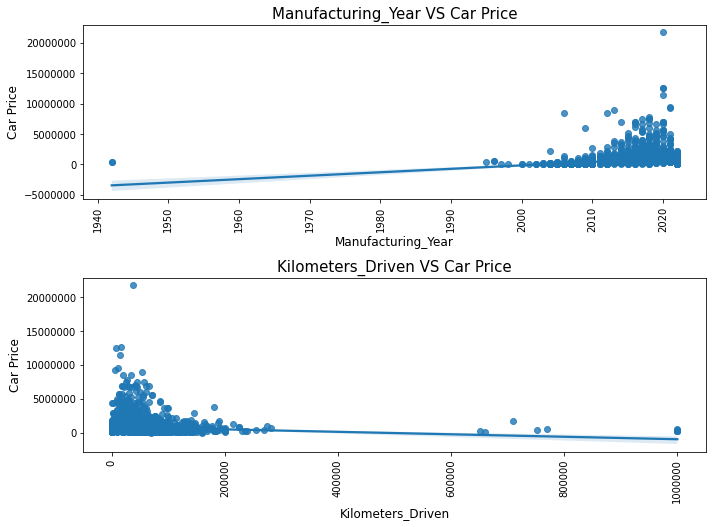

In [15]:
numeric_columns = list(data.drop(['Car_Price'],axis =1).select_dtypes(["int64","float64"]))
plt.figure(figsize = [10,10])
for i in range (len(numeric_columns)):
    plt.subplot(3,1,i+1)
    sns.regplot(x = data[numeric_columns[i]],y = data['Car_Price'], data = data)
    plt.xticks(rotation = 90)
    plt.title(f"{numeric_columns[i]} VS Car Price",fontsize=15)
    plt.xlabel(numeric_columns[i],fontsize = 12)
    plt.ylabel('Car Price', fontsize = 12)
    ax = plt.gca()
    ax.ticklabel_format(style='plain')
    plt.tight_layout()

Observations

* The sale price of car is increasing if the car is recently manufactured. 
* The sale price of car is slightly decreasing for the cars which have been driven most. 

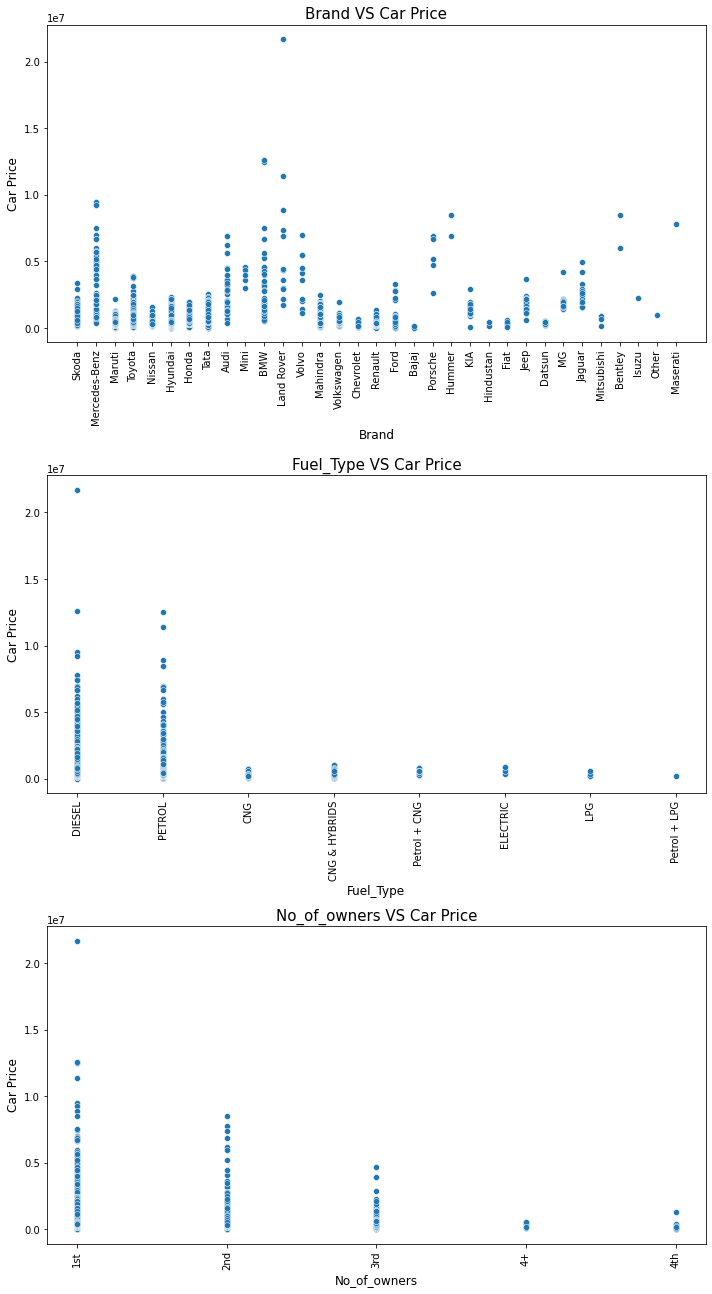

In [16]:
categorical_column = list(data.drop(['Model','Location'],axis =1).select_dtypes("O"))
plt.figure(figsize = [10,30])
for i in range (len(categorical_column)):
    plt.subplot(5,1,i+1)
    sns.scatterplot(x = data[categorical_column[i]],y = data['Car_Price'], data = data)
    plt.xticks(rotation = 90)
    plt.title(f"{categorical_column[i]} VS Car Price",fontsize=15)
    plt.xlabel(categorical_column[i],fontsize = 12)
    plt.ylabel('Car Price', fontsize = 12)
    plt.tight_layout()

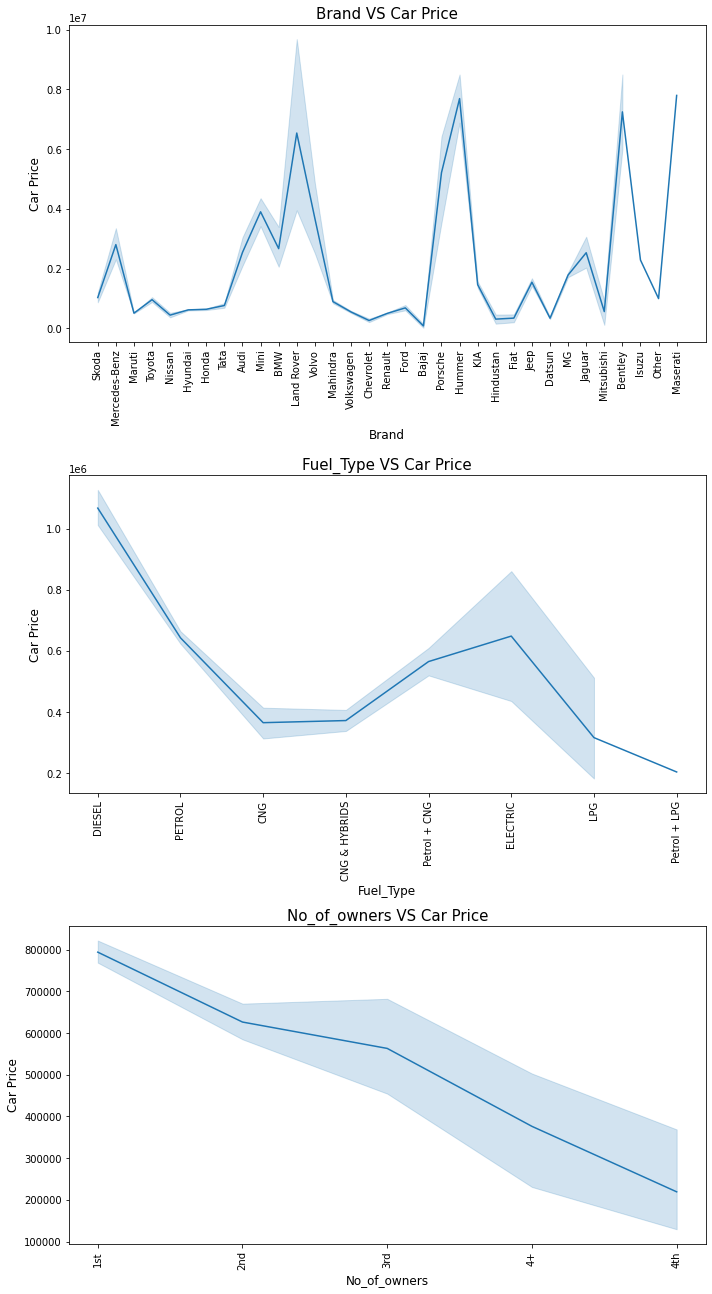

In [17]:
categorical_column = list(data.drop(['Model','Location'],axis =1).select_dtypes("O"))
plt.figure(figsize = [10,30])
ax = plt.gca()
ax.ticklabel_format(style='plain')
for i in range (len(categorical_column)):
    plt.subplot(5,1,i+1)
    sns.lineplot(x = data[categorical_column[i]],y = data['Car_Price'], data = data)
    plt.xticks(rotation = 90)
    plt.title(f"{categorical_column[i]} VS Car Price",fontsize=15)
    plt.xlabel(categorical_column[i],fontsize = 12)
    plt.ylabel('Car Price', fontsize = 12)
    plt.tight_layout()

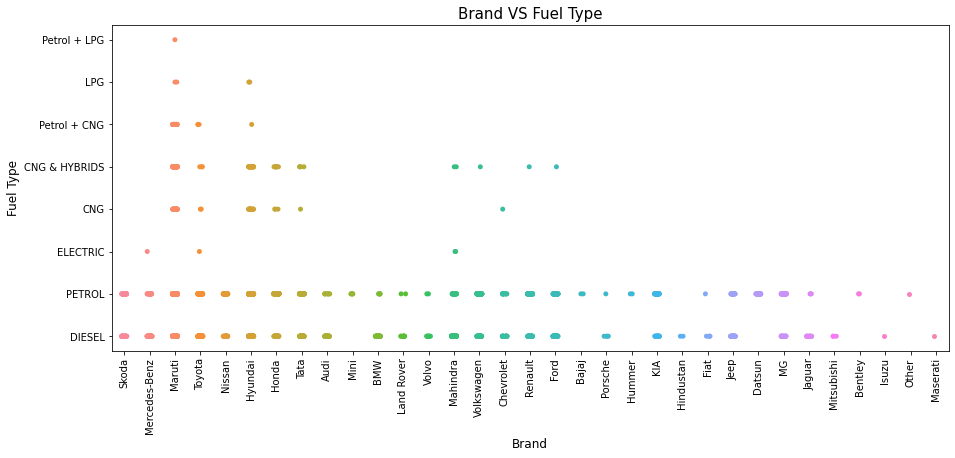

In [18]:
plt.figure(figsize = (15,6))
sns.stripplot(x = 'Brand',y = 'Fuel_Type', data = data)
plt.xticks(rotation = 90)
plt.title("Brand VS Fuel Type",fontsize=15)
plt.xlabel("Brand",fontsize = 12)
plt.ylabel('Fuel Type', fontsize = 12)
plt.show()

<Figure size 1080x432 with 0 Axes>

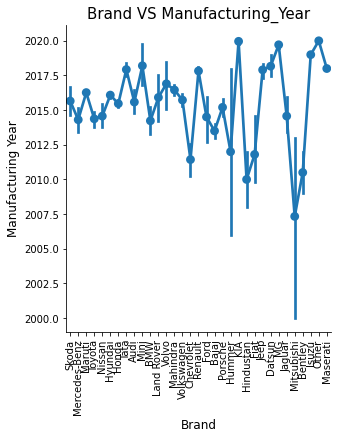

In [19]:
plt.figure(figsize = (15,6))
sns.factorplot(x = 'Brand',y = 'Manufacturing_Year', data = data)
plt.xticks(rotation = 90)
plt.title("Brand VS Manufacturing_Year",fontsize=15)
plt.xlabel("Brand",fontsize = 12)
plt.ylabel('Manufacturing Year', fontsize = 12)
plt.show()

Observations:
    
* The price for the luxuries car brands like Mercedes-Benz, BMW, Land Rover, Hummer, Bentley are higher compared to other brands.
* The car price for diesel, and petrol fueled cars are having higher price compared to other types fueled cars.
* The price of car is decreasing as the number of owners of the cars are increasing. Most of the cars.
* Maruti is having different fuel type cars which are available for sale. Toyota and Hyundai is also having a variety of cars which are powered by different types of fuel.
* Most of the cars which are available for sale are manufactured after 2015 and most of the cars are of brands like KIA, MG which are available for sale were manufactured after the year 2019.

### Statistical Summary

### Describe of the data

In [20]:
data.describe()

,Manufacturing_Year,Kilometers_Driven,Car_Price
count,5270.000000,5270.000000,5.270000e+03
mean,2016.124502,51418.923866,7.531877e+05
std,3.708293,50150.036814,8.354115e+05
min,1942.000000,1.000000,1.500000e+04
25%,2014.000000,25001.250000,3.999990e+05
50%,2017.000000,45280.500000,5.600000e+05
75%,2019.000000,69785.250000,8.299498e+05
max,2022.000000,999999.000000,2.170000e+07


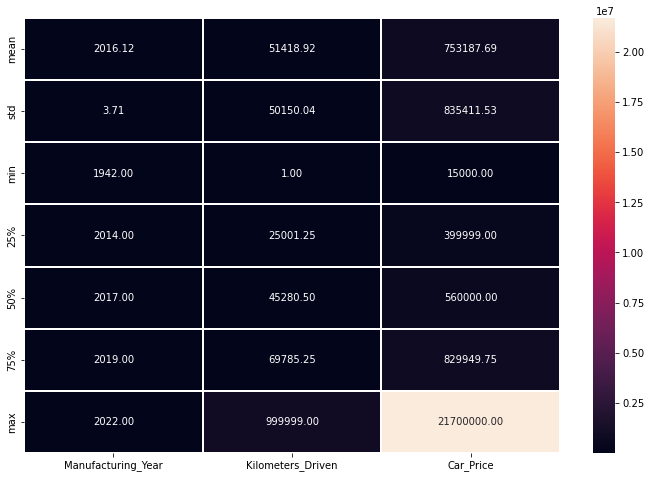

In [21]:
plt.figure(figsize=[12,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f',linewidths=0.1)
plt.show()

Observations:

* The mean of the columns ['Kilometers_Driven','Car_Price'] are higher than the median value. That means the the distribution of values in these columns are not normal and skewness is present in the data distribution. 
* The max value of the columns ['Kilometers_Driven','Car_Price'] are having huge difference between the 75%. Possible outliers are present in the data of these columns.
    

In [22]:
numeric_columns = list(data.select_dtypes(["int64","float64"]))
categorical_columns = list(data.select_dtypes('O'))

### Encoding of Categorical Variables

In [23]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = onc.fit_transform(data[i].values.reshape(-1,1)).astype('int64')    #Ordinal Encoding for the features.

We have encoded the categorical columns of the dataset.

### Correlation

In [24]:
Correlation = data.corr()
Correlation

,Brand,Model,Manufacturing_Year,Kilometers_Driven,Fuel_Type,No_of_owners,Location,Car_Price
Brand,1.000000,0.135774,0.067011,0.057580,-0.051195,0.003905,0.020551,-0.043915
Model,0.135774,1.000000,-0.057169,0.040929,-0.136424,0.038807,0.024914,-0.007641
Manufacturing_Year,0.067011,-0.057169,1.000000,-0.387111,0.131890,-0.326692,-0.007963,0.251655
Kilometers_Driven,0.057580,0.040929,-0.387111,1.000000,-0.283972,0.165304,0.050995,-0.109295
Fuel_Type,-0.051195,-0.136424,0.131890,-0.283972,1.000000,-0.055112,-0.032519,-0.173148
No_of_owners,0.003905,0.038807,-0.326692,0.165304,-0.055112,1.000000,0.037322,-0.095251
Location,0.020551,0.024914,-0.007963,0.050995,-0.032519,0.037322,1.000000,-0.024122
Car_Price,-0.043915,-0.007641,0.251655,-0.109295,-0.173148,-0.095251,-0.024122,1.000000


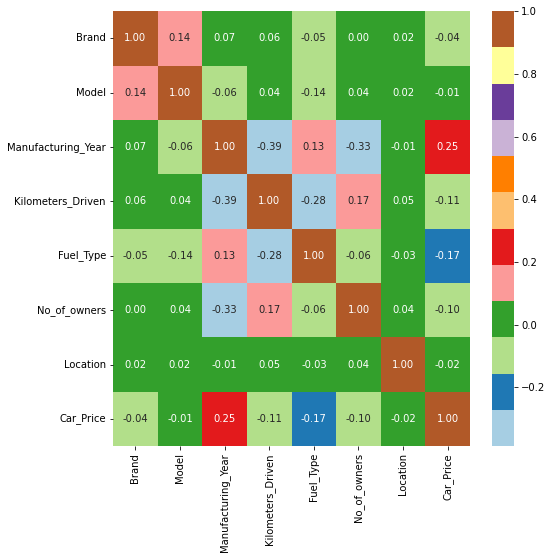

In [25]:
#Plotting the correlation of columns
plt.figure(figsize=[8,8])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='Paired')
plt.show()

None of the columns are having perfect correlation with another variable. So we can evaluate the correlation of features with the target variable.

### Correlation with Target Variable

Manufacturing_Year    0.251655
Model                -0.007641
Location             -0.024122
Brand                -0.043915
No_of_owners         -0.095251
Kilometers_Driven    -0.109295
Fuel_Type            -0.173148
Name: Car_Price, dtype: float64


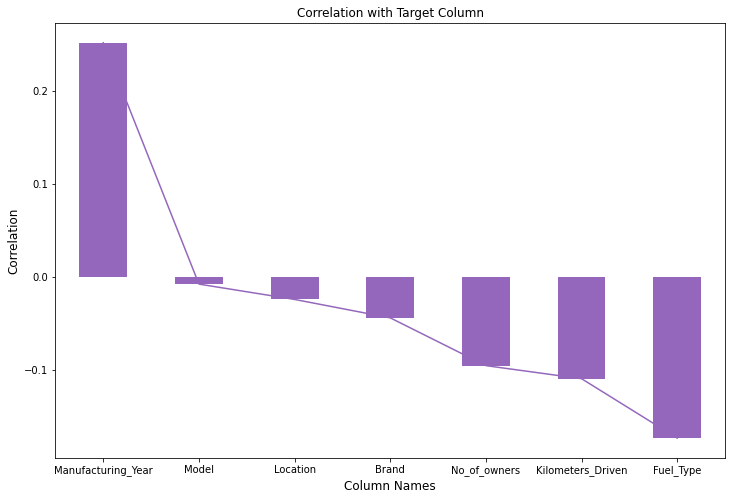

In [26]:
print(Correlation['Car_Price'].drop('Car_Price').sort_values(ascending = False))
plt.figure(figsize = [12,8])
plt.subplot()
Correlation['Car_Price'].sort_values(ascending= False).drop('Car_Price').plot(kind = 'bar', color ='tab:purple')
Correlation['Car_Price'].sort_values(ascending= False).drop('Car_Price').plot(kind = 'line', color ='tab:purple')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:
    
* Except the column 'Manufacturing_Year', rest of the columns are having a negative correlation to the target variable 'Car_Price'.
* The column "Manufacturing_Year' is having the highest positive correlation to the target variable 'Car_Price'. The column 'Fuel_Type' is having highest negative correlation to the target variable 'Car_Price'.
* The column 'Model' is having least negative correlation to the target variable 'Car_Price'.

### Distribution of data in columns

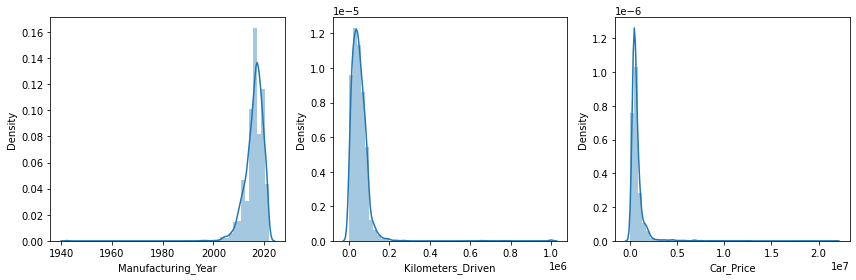

In [27]:
#Skewness of Numerical columns

plt.figure(figsize = [12,4])
for i in range(0,len(numeric_columns)):
    plt.subplot(1,3,i+1)
    sns.distplot(data[numeric_columns[i]])
    plt.tight_layout()

Observations:
    
* The data in columns are not normally distributed. 
* Skewness is present in the data of all numerical columns.

### Skewness

In [28]:
Skewness = data[numeric_columns].skew()
Skewness.sort_values(ascending = False)

Kilometers_Driven     10.186431
Car_Price              7.927747
Manufacturing_Year    -3.829946
dtype: float64

* There is huge amount of skewness present in the data of numerical columns in the dataset.
* The column "Car_Price" is our target variable and we will not remove the skewness of this column. We can handle the skewness of the rest of columns in following steps.

### Checking the presence of outliers

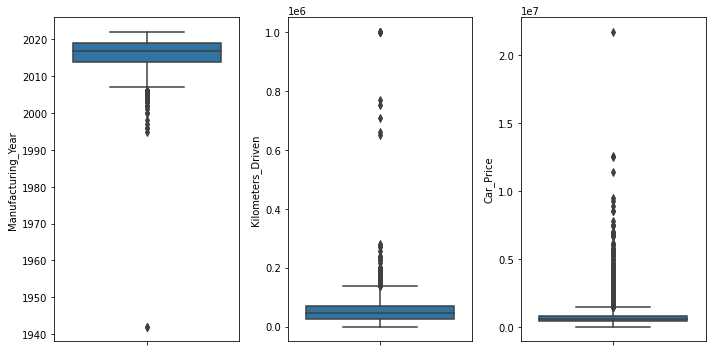

In [29]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [10,5])
for i in range(0,len(numeric_columns)):
    plt.subplot(1,3,i+1)
    sns.boxplot(y = data[numeric_columns[i]])
    plt.tight_layout()

* Outliers are present in the data of all the numerical columns. 
* We will handle the outliers of the data in the following steps. Since the column 'Car_Price' is our target variable, we will not remove the outliers from this column. 

### Data Cleaning

### Removing Skewness

In [30]:
x = data.drop('Car_Price',axis = 1)
y = data['Car_Price']
c = x.columns
print(x.shape)
print(y.shape)

(5270, 7)
(5270,)


In [31]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)

In [32]:
#We can set the skewness standard limit as +/-0.5.
x.drop(categorical_columns,axis =1).skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

Kilometers_Driven     10.186431
Manufacturing_Year    -3.829946
dtype: float64

These numerical columns are having skewness which are beyond the standard limit. We can remove the skewness of these columns.

In [33]:
from sklearn.preprocessing import power_transform
x['Kilometers_Driven'] = power_transform(x['Kilometers_Driven'].values.reshape(-1,1))
x['Manufacturing_Year'] = power_transform(x['Manufacturing_Year'].values.reshape(-1,1))

In [34]:
x.drop(categorical_columns,axis =1).skew().sort_values(ascending = False)

Kilometers_Driven     0.044737
Manufacturing_Year   -0.049705
dtype: float64

We have successfully removed the skewness of the data from the columns ['Kilometers_Driven', 'Manufacturing_Year'].

### Removing the Outliers

#### Using ZScore method

In [35]:
from scipy.stats import zscore
df = pd.DataFrame({})
df = x.drop(categorical_columns,axis = 1).copy()   #removing the categorical column from the dataset before removing outliers.
z = np.abs(zscore(df))
z

,Manufacturing_Year,Kilometers_Driven
0,1.193591,0.475574
1,0.251343,0.072757
2,1.845683,1.544303
3,1.548193,1.627686
4,0.251343,0.774408
...,...,...
5265,1.339544,1.060629
5266,0.452221,0.181137
5267,0.874338,0.709414
5268,0.075858,0.608036


In [36]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new[categorical_columns] = x[categorical_columns]
df_new['Car_Price'] = y.copy()
df_new

,Manufacturing_Year,Kilometers_Driven,Brand,Model,Fuel_Type,No_of_owners,Location,Car_Price
0,-1.193591,0.475574,1.518042,0.787653,-1.366359,-0.484902,0.651635,425000
1,-0.251343,-0.072757,0.550195,0.178555,0.663345,-0.484902,1.504424,6990000
2,1.845683,-1.544303,0.550195,0.117207,0.663345,-0.484902,-0.936766,4990000
3,-1.548193,1.627686,1.518042,0.787653,0.663345,-0.484902,0.892499,165000
4,-0.251343,0.774408,0.273668,0.892821,-2.719494,1.365519,0.892499,395000
...,...,...,...,...,...,...,...,...
5265,1.339544,-1.060629,0.273668,0.603609,0.663345,-0.484902,-0.845628,439699
5266,0.452221,0.181137,0.273668,-0.172005,0.663345,-0.484902,-0.865158,474799
5267,0.874338,0.709414,0.273668,-1.166718,0.663345,-0.484902,-0.904217,508199
5268,0.075858,0.608036,-0.417651,-0.978292,0.663345,-0.484902,-0.819589,1125799


In [37]:
df[categorical_columns] = x[categorical_columns]
df['Car_Price'] = y.copy()
df.shape

(5270, 8)

In [38]:
df_new.shape

(5252, 8)

In [39]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

0.3415559772296015

0.34% of the data loss is incurred after removing outliers using zscore outlier removal method.

#### Using IQR (Inter Quantile Range) method

In [40]:
# 1st quantile

Q1=x.quantile(0.25)

# 3rd quantile
Q3=x.quantile(0.75)

# IQR
df
IQR=Q3 - Q1
df_a = df.drop(categorical_columns, axis = 1)
df_a.drop('Car_Price',axis = 1,inplace = True)
df_1=df_a[~((df_a < (Q1 - 1.5 * IQR)) |(df_a > (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
df_1[categorical_columns] = x[categorical_columns]
df_1['Car_Price'] = df['Car_Price']
df_1.shape

(5256, 8)

In [42]:
df.shape

(5270, 8)

In [43]:
data_loss = (df.shape[0]-df_1.shape[0])/df.shape[0]*100
data_loss

0.2656546489563567

0.27% of data loss is incurring after removing outliers using IQR outlier removal method. So the IQR method is slightly better as it is losing the less data from the dataset after removing outliers.

### Checking the Multicolinearity of variables in the dataframe

In [44]:
x = df_1.drop('Car_Price',axis = 1)
y = df_1['Car_Price']
print(x.shape)
print(y.shape)

(5256, 7)
(5256,)


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#User defined function to calculate variance of inflation in dataset.
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by ='VIF Factor', ascending = False))

In [46]:
calc_vif(x)

,Column Name,VIF Factor
1,Kilometers_Driven,1.969853
0,Manufacturing_Year,1.895681
4,Fuel_Type,1.181627
5,No_of_owners,1.119215
2,Brand,1.039727
3,Model,1.039615
6,Location,1.004418


We can see that none of the columns are having variance inflation factor higher than 5. That means there is no or least multicolinearity existing between the variables in the dataset.

In [47]:
#Final Dataset
data.head(10)

,Brand,Model,Manufacturing_Year,Kilometers_Driven,Fuel_Type,No_of_owners,Location,Car_Price
0,28,550,2012.0,58000.0,2,0,363,425000
1,21,411,2016.0,41000.0,5,0,494,6990000
2,21,397,2021.0,9700.0,5,0,119,4990000
3,28,550,2010.0,120000.0,5,0,400,165000
4,19,574,2016.0,70000.0,0,1,400,395000
5,30,342,2018.0,11800.0,2,0,370,2129000
6,24,549,2012.0,72534.0,2,0,367,220000
7,11,535,2013.0,65000.0,5,0,503,180000
8,11,323,2011.0,62300.0,1,1,370,221000
9,30,156,2012.0,47000.0,5,0,370,445000


### EDA Completed

### Building the Model

#### Splitting the data into features and target

In [201]:
features = x.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(5256, 7)
(5256,)


In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split

In [203]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
estimator = [('LR', LinearRegression()),
             ('KNN',KNeighborsRegressor()),
             ('SVR', SVR(gamma='auto')),
             ('DTR',DecisionTreeRegressor()),
             ('RFR',RandomForestRegressor(n_estimators=100))]
vtr = VotingRegressor(estimators=estimator)
sgd = SGDRegressor()
etr = ExtraTreesRegressor()
xgb = XGBRegressor()
lgbmr = LGBMRegressor()
cbr = CatBoostRegressor(verbose=0, n_estimators=100)

#### Finding the best random_state

In [204]:
#User defined function for finding the best random state
def best_ran(model):
    maxacc = 0
    maxrs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = r2_score(target_test,pred_test)
        if acc>maxacc:
            maxacc = acc
            maxrs = i
    print("At random state ", maxrs, 'the model is having r2 score of ', maxacc)

In [205]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    acc = r2_score(target_test,pred_test)
    mse = mean_squared_error(target_test,pred_test)
    mae = mean_absolute_error(target_test,pred_test)
    print("R2 score is ", acc)
    print("_"*50)
    print("Mean Sqaured Error is ",mse)
    print("_"*50)
    print("Mean Absolute Error is ",mae)
    print("_"*50)

#### LinearRegression

In [206]:
best_ran(lr)

LinearRegression()
At random state  66 the model is having r2 score of  0.21066168609496627


In [207]:
mod_test(lr,66)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

LinearRegression()
R2 score is  0.21066168609496627
__________________________________________________
Mean Sqaured Error is  326251664014.75555
__________________________________________________
Mean Absolute Error is  323945.9220677433
__________________________________________________
Coefficent is  [ 234187.48211548  -59570.3871517   -59721.46345499  -11100.88281393
 -196499.72134502   -1578.5804679   -29098.09988618]
__________________________________________________
Intercept is  756121.2168566744
__________________________________________________


#### KNeighborsRegressor

In [208]:
best_ran(knn)

KNeighborsRegressor()
At random state  26 the model is having r2 score of  0.4090443620841965


In [221]:
mod_test(knn,26)

KNeighborsRegressor()
R2 score is  0.4090443620841965
__________________________________________________
Mean Sqaured Error is  374620221232.4312
__________________________________________________
Mean Absolute Error is  263980.9536121673
__________________________________________________


#### SVR

In [209]:
best_ran(svr)

SVR()
At random state  0 the model is having r2 score of  0


In [222]:
mod_test(svr,0)

SVR()
R2 score is  -0.06913890396706468
__________________________________________________
Mean Sqaured Error is  537242481280.7603
__________________________________________________
Mean Absolute Error is  359496.7729457244
__________________________________________________


#### DecisionTreeRegressor

In [210]:
best_ran(dtr)

DecisionTreeRegressor()
At random state  37 the model is having r2 score of  0.7459443872436762


In [224]:
mod_test(dtr,37)

DecisionTreeRegressor()
R2 score is  0.7759687145668503
__________________________________________________
Mean Sqaured Error is  149824305000.84625
__________________________________________________
Mean Absolute Error is  139068.56511406845
__________________________________________________


#### RandomForestRegressor

In [211]:
best_ran(rfr)

RandomForestRegressor()
At random state  37 the model is having r2 score of  0.7715769660146176


In [225]:
mod_test(rfr,37)

RandomForestRegressor()
R2 score is  0.764982505928804
__________________________________________________
Mean Sqaured Error is  157171497919.04587
__________________________________________________
Mean Absolute Error is  145309.61674139957
__________________________________________________


#### AdaBoostRegressor

In [212]:
best_ran(abr)

AdaBoostRegressor()
At random state  87 the model is having r2 score of  0.258378499280712


In [226]:
mod_test(abr,87)

AdaBoostRegressor()
R2 score is  -2.1021601579204146
__________________________________________________
Mean Sqaured Error is  2707485409214.28
__________________________________________________
Mean Absolute Error is  1442204.2423792903
__________________________________________________


#### GradientBoostingRegressor

In [213]:
best_ran(gbr)

GradientBoostingRegressor()
At random state  43 the model is having r2 score of  0.7815085177129121


In [227]:
mod_test(gbr,43)

GradientBoostingRegressor()
R2 score is  0.776501770547781
__________________________________________________
Mean Sqaured Error is  116368983490.30432
__________________________________________________
Mean Absolute Error is  181955.74393948444
__________________________________________________


#### VotingRegressor

In [214]:
best_ran(vtr)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At random state  66 the model is having r2 score of  0.6361945881738365


In [228]:
mod_test(vtr,66)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
R2 score is  0.6321637503733089
__________________________________________________
Mean Sqaured Error is  152035174793.36902
__________________________________________________
Mean Absolute Error is  190755.73064852043
__________________________________________________


#### SGDRegressor

In [215]:
best_ran(sgd)

SGDRegressor()
At random state  66 the model is having r2 score of  0.20715106149005058


In [230]:
mod_test(sgd,66)

SGDRegressor()
R2 score is  0.20569494185224724
__________________________________________________
Mean Sqaured Error is  328304533545.32
__________________________________________________
Mean Absolute Error is  325932.2412418101
__________________________________________________


#### ExtraTreesRegressor

In [216]:
best_ran(etr)

ExtraTreesRegressor()
At random state  8 the model is having r2 score of  0.7075709206049032


In [231]:
mod_test(etr,8)

ExtraTreesRegressor()
R2 score is  0.7101048210956727
__________________________________________________
Mean Sqaured Error is  138832115516.93463
__________________________________________________
Mean Absolute Error is  149806.30393536124
__________________________________________________


#### XGBRegressor

In [217]:
best_ran(xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
At random state  37 the model is having r2 score of  0.8497629094009553


In [232]:
mod_test(xgb,37)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
R2 score is  0.8497629094009553
__________________________________________________
Mean Sqaured Error is  100473322914.83778
__________________________________________________
Mean Absolute Error is  131714.07818812382
__________________________________________________


#### LGBMRegressor

In [218]:
best_ran(lgbmr)

LGBMRegressor()
At random state  16 the model is having r2 score of  0.7442745416456197


In [233]:
mod_test(lgbmr,16)

LGBMRegressor()
R2 score is  0.7442745416456197
__________________________________________________
Mean Sqaured Error is  147486655203.0439
__________________________________________________
Mean Absolute Error is  169259.84922841046
__________________________________________________


#### CatBoostRegressor

In [219]:
best_ran(cbr)

At random state  70 the model is having r2 score of  0.8336599047513329


In [234]:
mod_test(cbr,70)

R2 score is  0.8336599047513329
__________________________________________________
Mean Sqaured Error is  113907699752.28934
__________________________________________________
Mean Absolute Error is  159444.29946298062
__________________________________________________


After testing the data with the regression algorithms, the ensemble methods are performing well and providing the best R2 Score. Out of that the XGBoost model(xgb) is providing the best R2 Score of 84.98%

Now let's check the cross validation for each model to find tbe best performing model.

### Cross Validation

In [235]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

#### LinearRegression

In [236]:
cross_val(lr,66)

LinearRegression()
At cv fold 7  the cv score is  0.1602592086826202 and the R2 score  is  0.21066168609496627


#### KNeighborsRegressor

In [237]:
cross_val(knn,26)

KNeighborsRegressor()
At cv fold 6  the cv score is  0.06286766980008612 and the R2 score  is  0.4090443620841965


#### SVR

In [238]:
cross_val(svr,0)

SVR()
At cv fold 0  the cv score is  0 and the R2 score  is  -0.06913890396706468


#### DecisionTreeRegressor

In [239]:
cross_val(dtr,37)

DecisionTreeRegressor()
At cv fold 0  the cv score is  0 and the R2 score  is  0.7638812386427065


#### RandomForestRegressor

In [240]:
cross_val(rfr,37)

RandomForestRegressor()
At cv fold 8  the cv score is  0.23267864095587695 and the R2 score  is  0.7813948565775681


#### AdaBoostRegressor

In [241]:
cross_val(abr,87)

AdaBoostRegressor()
At cv fold 0  the cv score is  0 and the R2 score  is  -1.5142886069794743


#### GradientBoostingRegressor

In [242]:
cross_val(gbr,43)

GradientBoostingRegressor()
At cv fold 9  the cv score is  0.38589722085427625 and the R2 score  is  0.7843173363863506


#### VotingRegressor

In [243]:
cross_val(vtr,66)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At cv fold 6  the cv score is  0.4911523166557685 and the R2 score  is  0.6396968402159033


#### SGDRegressor

In [244]:
cross_val(sgd,66)

SGDRegressor()
At cv fold 7  the cv score is  0.17142521509148537 and the R2 score  is  0.21093491106151396


#### ExtraTreesRegressor

In [245]:
cross_val(etr,8)

ExtraTreesRegressor()
At cv fold 8  the cv score is  0.223767983819791 and the R2 score  is  0.7168263341404635


#### XGBRegressor

In [246]:
cross_val(xgb,37)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
At cv fold 8  the cv score is  0.4693459414674942 and the R2 score  is  0.8497629094009553


#### LGBMRegressor

In [247]:
cross_val(lgbmr,16)

LGBMRegressor()
At cv fold 9  the cv score is  0.4218253298532209 and the R2 score  is  0.7442745416456197


#### CatBoostRegressor

In [248]:
cross_val(cbr,70)

At cv fold 6  the cv score is  0.5064668304560532 and the R2 score  is  0.8336599047513329


After tsting the several algorithms and cross validations. the ensemble method,  XGBoost Regressor model(xgb) and CatBoostRegressor model(cbr) are performing well by providing the best score.

### The XGBoost Regressor model(xgb) is providing an R2 Score of 84.98% with 46.93% cross validation mean score for 8 cross validations. While the CatBoost Regressor(cbr) is providing an R2 Score of 83.37% with 50.65% cross validation mean score for 6 cross validations.  So we can consider the xgb and cbr models as the best performing models.

#### XGBoost Regressor

In [249]:
xgb = XGBRegressor()
features_train, features_test,target_train,target_test = train_test_split(features, target, test_size = 0.20, random_state=37)
xgb.fit(features_train, target_train)
pred_test_xgb = xgb.predict(features_test)

cv_score = cross_val_score(xgb,features, target, cv = 8)
cv_mean =cv_score.mean()
print("At cv fold",8," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_xgb))

At cv fold 8  the cv score is  0.4693459414674942 and the R2 score  is  0.8497629094009553


#### CatBoost Regressor

In [250]:
cbr = CatBoostRegressor(verbose = 0, n_estimators=100)
features_train, features_test,target_train,target_test = train_test_split(features, target, test_size = 0.20, random_state=70)
cbr.fit(features_train, target_train)
pred_test_cbr = cbr.predict(features_test)

cv_score = cross_val_score(cbr,features, target, cv = 6)
cv_mean =cv_score.mean()
print("At cv fold",6," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test_cbr))

At cv fold 6  the cv score is  0.5064668304560532 and the R2 score  is  0.8336599047513329


### Regularization

In [251]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

#### Lasso(L1)

In [252]:
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [253]:
ls = Lasso(alpha = 1, random_state = 0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.15348879286145223

In [254]:
cross_val(ls,0)

Lasso(alpha=1, random_state=0)
At cv fold 7  the cv score is  0.16026060346850152 and the R2 score  is  0.18999685363065832


### Ridge(L2)

In [255]:
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [256]:
rd = Ridge(alpha = 1,random_state=0)
rd.fit(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.1534845664088258

In [257]:
cross_val(rd,0)

Ridge(alpha=1, random_state=0)
At cv fold 7  the cv score is  0.16029718414566416 and the R2 score  is  0.18999077256912567


### ElasticNet

In [258]:
en = ElasticNet()
clf = GridSearchCV(en,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [259]:
en = ElasticNet(alpha = 0.1, random_state = 0)
en.fit(features_train,target_train)
pred_en = en.predict(features_test)

ens = r2_score(target_test,pred_en)
ens

0.1522808194415346

In [260]:
cross_val(en,0)

ElasticNet(alpha=0.1, random_state=0)
At cv fold 7  the cv score is  0.16727058784440452 and the R2 score  is  0.1882345027621456


The regularization techniques didn't provide any better results. So we can consider the CatBoost and XGBoost Regressor models as the best performing models.

### Hyperparameter Tuning

#### CatBoost Regressor

In [261]:
cbr.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 100,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.33397799730300903,
 'score_function': 'Cosine',
 'task_type':

In [262]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [100,150,200,400],
              'eval_metric' : ['RMSE','Logloss', 'CrossEntropy', 'MAE'],
              'sampling_frequency' : ['PerTree ','PerTreeLevel'],
              'sampling_unit' : ['Object','Group']}

grid = GridSearchCV(estimator = CatBoostRegressor(verbose = 0),param_grid=parameters, cv = 6)

In [263]:
grid.fit(features,target)

GridSearchCV(cv=6,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000017B279BA130>,
             param_grid={'eval_metric': ['RMSE', 'Logloss', 'CrossEntropy',
                                         'MAE'],
                         'n_estimators': [100, 150, 200, 400],
                         'sampling_frequency': ['PerTree ', 'PerTreeLevel'],
                         'sampling_unit': ['Object', 'Group']})

In [264]:
grid.best_score_

0.4120844519892437

In [265]:
grid.best_params_

{'eval_metric': 'RMSE',
 'n_estimators': 100,
 'sampling_frequency': 'PerTreeLevel',
 'sampling_unit': 'Object'}

In [266]:
cbr = CatBoostRegressor(verbose = 0,n_estimators=100, eval_metric = 'RMSE',sampling_frequency = 'PerTreeLevel', sampling_unit = 'Object')
features_train, features_test,target_train,target_test = train_test_split(features, target, test_size = 0.20, random_state=70)
cbr.fit(features_train, target_train)
pred_test_cbr = cbr.predict(features_test)

print('R2 Score',r2_score(target_test,pred_test_cbr))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_cbr))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_cbr))

R2 Score 0.8166500553677947
Mean Squared Error 125555840349.51102
Mean Absolute Error 169850.9566767898


#### XGBoost Regressor

In [267]:
parameters = {'objective':['reg:squarederror','reg:squaredlogerror'],
             'base_score':[0.5,1,2],
             'eval_metric':['rmse','rmsle','mae'],
             'seed':[0,1,2],
             'seed_per_iteration':[True, False]}

grid = GridSearchCV(estimator = XGBRegressor(),param_grid=parameters, cv = 8)

In [268]:
grid.fit(features,target)

GridSearchCV(cv=8,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'base_score': [0.5, 1, 2],
                         'eval_metric': ['rmse', 'rmsle', 'mae'],
                         'objective': ['reg:squarederror',
                                       'reg:squaredlogerror'],
                         'seed': [0, 1, 2],
                         'seed_per_iteration': [True, False]})

In [269]:
grid.best_score_

0.46934597154114394

In [270]:
grid.best_params_

{'base_score': 2,
 'eval_metric': 'rmse',
 'objective': 'reg:squarederror',
 'seed': 0,
 'seed_per_iteration': True}

In [271]:
xgb = XGBRegressor(base_score = 2,eval_metric = 'rmse',objective = 'reg:squarederror',seed = 0,seed_per_iteration = True)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 37)
xgb.fit(features_train, target_train)
pred_test_xgb = xgb.predict(features_test)


print('R2 Score',r2_score(target_test,pred_test_xgb))
print('Mean Squared Error',mean_squared_error(target_test,pred_test_xgb))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test_xgb))

R2 Score 0.8497629078430087
Mean Squared Error 100473323956.73813
Mean Absolute Error 131714.07632040163


After all the tests, cross validations, regularizationa and hyperparameter tuning the XGBoost model is performing well. So we can consider this model as the best performing model.

### The XGBoost Regressor model(xgb) is providing a final R2 Score of 84.98%.

### Saving the best model

In [272]:
import pickle

filename = 'Used_car_price_prediction_model.pkl'
pickle.dump(xgb,open(filename,'wb'))

### Conclusion

In [279]:
original = np.array(target_test)
predicted = np.round(np.array(xgb.predict(features_test)))

prediction_test = pd.DataFrame({'Original Car Price':original,'Predicted Car Price':predicted})
prediction_test.sample(20)

,Original Car Price,Predicted Car Price
696,652000,637556.0
404,250000,457017.0
540,625299,586307.0
17,560000,386586.0
809,549000,692200.0
911,275000,506822.0
520,850000,1109665.0
830,375000,382855.0
961,250000,389303.0
310,245000,206626.0


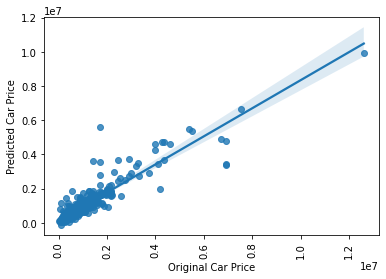

In [280]:
sns.regplot('Original Car Price','Predicted Car Price', data = prediction_test)
plt.xticks(rotation = 90)
plt.show()

Our model is performing well with predictions and provided almost accurate results.

Now this model can be used to predict the price of used cars in India with the following variable information about the house.(Important Variables)

`Brand`	`Model`	`Manufacturing_Year`	`Kilometers_Driven`	`Fuel_Type`	`No_of_owners`	`Location`	`Car_Price`

#### Impact of Variables on Target Variable(Correlation)

* The column "Manufacturing_Year' is having the highest positive correlation to the target variable 'Car_Price'. The column 'Fuel_Type' is having highest negative correlation to the target variable 'Car_Price'.
* The column 'Model' is having least negative correlation to the target variable 'Car_Price'.

### Used car price prediction model created successfully.